# 6th SEMESTER TRAINING PROJECT 
## -ANSHUL GUPTA (UE178022) IT SECTION-1 (2017-2021)

## The dataset used here is originally "Statlog (German Credit Data) Data Set" from UCI Machine learning repository

## since the original source contains data in a format that no one can understand , the dataset is imported here from Kaggle website and is in a format which can be understood (not clean or normalised) , only understandable !

- ## About the data- This dataset classifies people described by a set of attributes as good or bad credit risks.

- ## __AIM__ - to make a model using the dataset which classifies new entries as good risk or bad risk and thus helping to identify which people should be given credit or not


In [224]:
import pandas as pd 
import numpy as np
df_raw1=pd.read_csv(r'C:\Users\Anshul\Desktop\6th sem training\german_credit_data (1).csv')
df_raw1.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


#### This is the description of the attributes as provided by the source :-
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (text - little, moderate, rich, quite rich)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

### IMPORTING THE LIBRARIES

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
print('done')

done


### EXPLORING THE DATASET

In [226]:
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [227]:
df_raw1.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [228]:
df_raw1.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [229]:
df_raw1.drop(columns=['Unnamed: 0'],inplace=True)
print('Done')

Done


Text(0.5, 1.0, 'Distribution of Age')

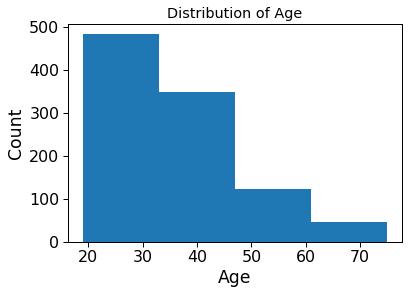

In [230]:
plt.hist(df_raw1.Age,bins=4,label='Age distribution')
plt.ylabel('Count')
plt.xlabel('Age')
sns.set_context("paper", font_scale=1.5)
plt.title('Distribution of Age')

We will define the age groups as follows :-

- 18-30 years = student
- 30-45 years = young adults
- 45-60 years = mature adults
- 60+ years = senior citizen

In [231]:
def age_cat(x):
    if x>=18 and x<30:
        return str("student")
    if x>=30 and x<45:
        return str("young adult")
    if x>=45 and x<60:
        return str("mature adult")
    else:
        return str("senior citizen")

In [232]:
df_raw1['Age']=df_raw1['Age'].apply(age_cat)

VALUES FOR ATTRIBUTE 'JOB' ARE NOT CONVENIENT TO READ IN DATAFRAME AS THEY ARE IN NUMBERS
Thue changing them into simple understandable language 

Attribute description=> 
- 0 - unskilled + non-resident
- 1 - unskilled + resident
- 2 - skilled
- 3 - highly skilled

In [233]:
def Job_cat(x):
    if x==0:
        return str(" unskilled + non-resident")
    if x==1:
        return str("unskilled + resident")
    if x==2:
        return str("skilled")
    if x==3:
        return str("highly skilled")

In [234]:
df_raw1['Job']=df_raw1['Job'].apply(Job_cat)

In [235]:
df_raw1.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,senior citizen,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,student,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,mature adult,male,unskilled + resident,own,little,NaN,2096,12,education,good
3,mature adult,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,mature adult,male,skilled,free,little,little,4870,24,car,bad
5,young adult,male,unskilled + resident,free,NaN,NaN,9055,36,education,good
6,mature adult,male,skilled,own,quite rich,NaN,2835,24,furniture/equipment,good
7,young adult,male,highly skilled,rent,little,moderate,6948,36,car,good
8,senior citizen,male,unskilled + resident,own,rich,NaN,3059,12,radio/TV,good
9,student,male,highly skilled,own,little,moderate,5234,30,car,bad


In [236]:
df_raw1['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

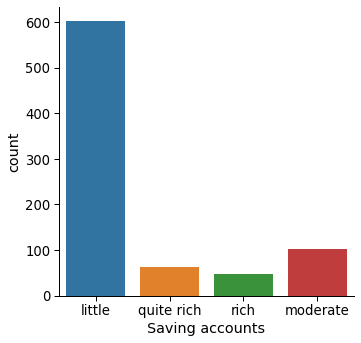

In [237]:
sns.catplot(x='Saving accounts',kind='count',data=df_raw1)
sns.set_context("paper", font_scale=1.5)

Its quite evident that most datapoints are having little amount in their savings account and this attribute is very crucial to determine who will be able to pay back credit 

Also there are 'Null' values in this attributes 

We replace the values by a simple rule
 - peope who are bad risk are assumed at very best guess that they must NOT be rich or moderate valued in saving account attribute.
 - thus labelling everyone classified as 'bad' risk as having 'little' value in savings account
 - Whereas its vice versa might not be true in all cases 


#### The reason for above assumption is that one who is rich or moderate has very good probability to be able to pay back ,whereas one who is at good risk cannot be determined as rich , moderate or little savings as the ability to pay back is driven by number of factors such as credit amount,duration, INTENTION etc.

In [238]:
df_raw1['Saving accounts']=df_raw1['Saving accounts'].replace(np.nan,0)

In [239]:
df_raw1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,senior citizen,male,skilled,own,0,little,1169,6,radio/TV,good
1,student,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,mature adult,male,unskilled + resident,own,little,NaN,2096,12,education,good
3,mature adult,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,mature adult,male,skilled,free,little,little,4870,24,car,bad


In [240]:
df_raw1['Saving accounts']=df_raw1['Saving accounts'].astype(str)

In [241]:
def acc_null_handling(vector):
    x=vector[0]
    y=vector[1]
    if y=='bad' and x=='0':
        return str('little')
    if y=='good' and x=='0':
        return 0
    else:
        return x

In [242]:
df_raw1['Savings acc']=df_raw1[['Saving accounts','Risk']].apply(acc_null_handling,axis=1)

In [243]:
df_raw1['Savings acc']=df_raw1['Savings acc'].replace('0',0)

In [244]:
df_raw1[df_raw1['Savings acc']!=0].count()

Age                 849
Sex                 849
Job                 849
Housing             849
Saving accounts     849
Checking account    545
Credit amount       849
Duration            849
Purpose             849
Risk                849
Savings acc         849
dtype: int64

EARLIER THERE USED TO BE 817 VALUES IN 'SAVING ACCOUNTS' ATTRIBUTE BUT NEW 'SAVINGS ACC' ATTRIBUTE HAS 849 VALUES

In [245]:
#dropping the 'savings account' column from the dataframe
df_raw1=df_raw1.drop(columns=['Saving accounts'])
df_raw1.head()

,Age,Sex,Job,Housing,Checking account,Credit amount,Duration,Purpose,Risk,Savings acc
0,senior citizen,male,skilled,own,little,1169,6,radio/TV,good,0
1,student,female,skilled,own,moderate,5951,48,radio/TV,bad,little
2,mature adult,male,unskilled + resident,own,NaN,2096,12,education,good,little
3,mature adult,male,skilled,free,little,7882,42,furniture/equipment,good,little
4,mature adult,male,skilled,free,little,4870,24,car,bad,little


In [246]:
#dropping the rows with 0 value in Savings account
df_raw1=df_raw1[df_raw1['Savings acc']!=0]
df_raw1.shape

(849, 10)

In [247]:
df_raw1['Checking account']=df_raw1['Checking account'].replace(np.nan,0)

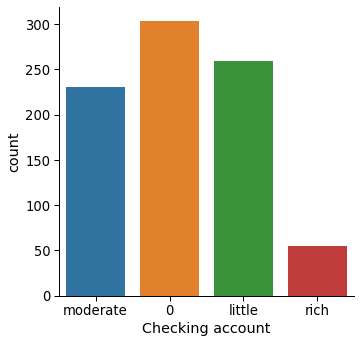

In [248]:
sns.catplot(x='Checking account',kind='count',data=df_raw1)
sns.set_context("paper", font_scale=1.5)

- Checking accounts are better for EVERYDAY TRANSACTIONS such as purchases, bills and ATM withdrawals.
- Savings accounts are better for STORING MONEY and earning interest, and because of that, you have a monthly limit on what you can withdraw

#### THUS IT IS QUITE REASONABLE TO SAY THAT AMOUNT IN SAVINGS ACCOUNT WILL BE GREATER THAN AMOUNT IN CHECKING ACCOUNT.
#### SO WE CAN SAY THAT THE STATUS OF SAVINGS ACCOUNT AND CHECKING ACCOUNT WILL BE SIMILAR IN MOST CASES.

Clearly most of the not null values are either 'little' or 'moderate' valued

Replacing null values in the 'Checking account' column by values in 'Savings acc' column

In [249]:
def chec_acc_null_handling(vec):
    x=vec[0]
    y=vec[1]
    if y=='little' and x==0:
        return str('little')
    if y=='moderate' and x==0:
        return str('moderate')
    if y=='rich' and x==0:
        return str('rich')
    if y=='quite rich' and x==0:
        return str('quite rich')
    else:
        return x

In [250]:
df_raw1['Checking Acc']=df_raw1[['Checking account','Savings acc']].apply(chec_acc_null_handling,axis=1) #axis 1 represents columns

In [251]:
df_raw1.head(10)

,Age,Sex,Job,Housing,Checking account,Credit amount,Duration,Purpose,Risk,Savings acc,Checking Acc
1,student,female,skilled,own,moderate,5951,48,radio/TV,bad,little,moderate
2,mature adult,male,unskilled + resident,own,0,2096,12,education,good,little,little
3,mature adult,male,skilled,free,little,7882,42,furniture/equipment,good,little,little
4,mature adult,male,skilled,free,little,4870,24,car,bad,little,little
6,mature adult,male,skilled,own,0,2835,24,furniture/equipment,good,quite rich,quite rich
7,young adult,male,highly skilled,rent,moderate,6948,36,car,good,little,moderate
8,senior citizen,male,unskilled + resident,own,0,3059,12,radio/TV,good,rich,rich
9,student,male,highly skilled,own,moderate,5234,30,car,bad,little,moderate
10,student,female,skilled,rent,moderate,1295,12,car,bad,little,moderate
11,student,female,skilled,rent,little,4308,48,business,bad,little,little


Text(0.5, 1, 'Distribution of Checking account')

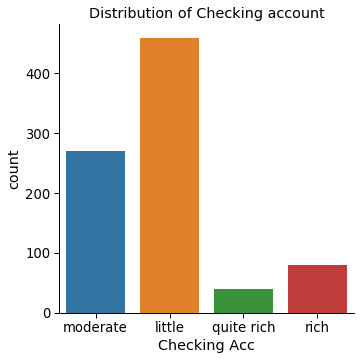

In [252]:
sns.catplot(x='Checking Acc',kind='count',data=df_raw1)
sns.set_context("paper", font_scale=1.5)
plt.title('Distribution of Checking account')

In [253]:
df_raw2=df_raw1.drop(columns=['Checking account'])
df_raw2.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Savings acc,Checking Acc
1,student,female,skilled,own,5951,48,radio/TV,bad,little,moderate
2,mature adult,male,unskilled + resident,own,2096,12,education,good,little,little
3,mature adult,male,skilled,free,7882,42,furniture/equipment,good,little,little
4,mature adult,male,skilled,free,4870,24,car,bad,little,little
6,mature adult,male,skilled,own,2835,24,furniture/equipment,good,quite rich,quite rich


In [254]:
df_raw2[df_raw2['Checking Acc']==0].count()

Age              0
Sex              0
Job              0
Housing          0
Credit amount    0
Duration         0
Purpose          0
Risk             0
Savings acc      0
Checking Acc     0
dtype: int64

In [255]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 1 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            849 non-null    object
 1   Sex            849 non-null    object
 2   Job            849 non-null    object
 3   Housing        849 non-null    object
 4   Credit amount  849 non-null    int64 
 5   Duration       849 non-null    int64 
 6   Purpose        849 non-null    object
 7   Risk           849 non-null    object
 8   Savings acc    849 non-null    object
 9   Checking Acc   849 non-null    object
dtypes: int64(2), object(8)
memory usage: 113.0+ KB


In [256]:
df_raw2['Credit amount'].dtype

dtype('int64')

In [257]:
df_raw2['Duration'].unique()

array([48, 12, 42, 24, 36, 30, 15,  9,  6, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 14, 33, 21, 16,  4, 47, 13, 39, 28,  5, 20, 26, 72, 22, 40],
      dtype=int64)

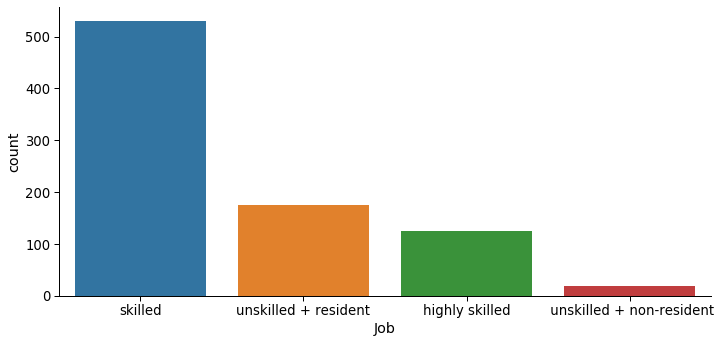

In [258]:
sns.catplot(x="Job",kind="count",data=df_raw2,height=5,aspect=2.0)
sns.set_context("paper", font_scale=1.5)

In [259]:
df_raw2.head(10)

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Savings acc,Checking Acc
1,student,female,skilled,own,5951,48,radio/TV,bad,little,moderate
2,mature adult,male,unskilled + resident,own,2096,12,education,good,little,little
3,mature adult,male,skilled,free,7882,42,furniture/equipment,good,little,little
4,mature adult,male,skilled,free,4870,24,car,bad,little,little
6,mature adult,male,skilled,own,2835,24,furniture/equipment,good,quite rich,quite rich
7,young adult,male,highly skilled,rent,6948,36,car,good,little,moderate
8,senior citizen,male,unskilled + resident,own,3059,12,radio/TV,good,rich,rich
9,student,male,highly skilled,own,5234,30,car,bad,little,moderate
10,student,female,skilled,rent,1295,12,car,bad,little,moderate
11,student,female,skilled,rent,4308,48,business,bad,little,little


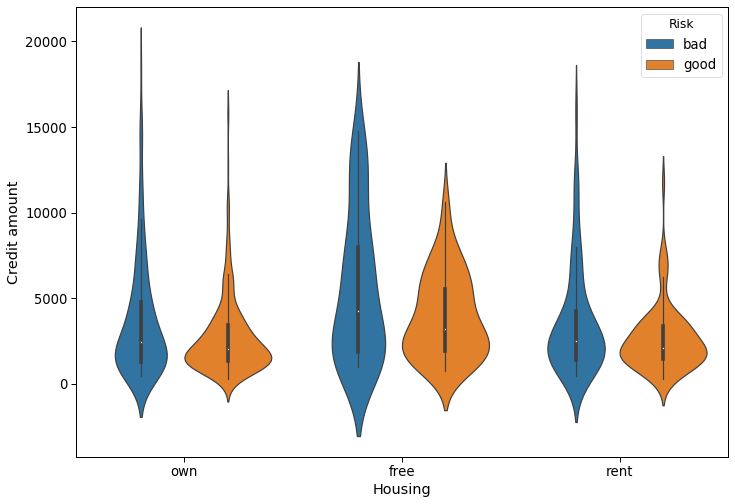

In [260]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x='Housing',y='Credit amount',hue='Risk',data=df_raw2,ax=ax)
sns.set_context("paper", font_scale=1.8)

### Insights from above visualization:
- People with 'free' category in Housing attribute provides with more of good risk.Median of credit amount in case of good risk 'free' housing is higher but so is in the case of bad risk .

- HIGHEST value of credit amount with good risk is with case of people who 'own' housing.
- More credit in every housing category means more of bad risk.

## OUTLIER AND ANAMOLY DETECTION

There could be following anomalies :
1. 'unskilled+non-resident' datapoints having 'quite rich' value in the savings account or checking account attribute and who own house
2. 'highly skilled' datapoints having 'little' value in the savings or checking account attribute and are living on rent.

In [261]:
def anom(vector):
    x=vector[0]
    y=vector[1]
    z=vector[2]
    w=vector[3]
    if x=='unskilled + non-resident' and y=='quite rich' and z=='quite rich' and w=='own':
        return 1
    if x=='highly skilled' and y=='little' and w=='rent' and (z in ('little','moderate')):
        return 1
    else:
        return 0

making a new column 'drop values' in which rows which have values=1 will be dropped.

In [262]:
df_raw2['drop values']=df_raw2[['Job','Savings acc','Checking Acc','Housing']].apply(anom,axis=1)

In [263]:
df_raw2.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Savings acc,Checking Acc,drop values
1,student,female,skilled,own,5951,48,radio/TV,bad,little,moderate,0
2,mature adult,male,unskilled + resident,own,2096,12,education,good,little,little,0
3,mature adult,male,skilled,free,7882,42,furniture/equipment,good,little,little,0
4,mature adult,male,skilled,free,4870,24,car,bad,little,little,0
6,mature adult,male,skilled,own,2835,24,furniture/equipment,good,quite rich,quite rich,0


In [264]:
df_raw2[df_raw2['drop values']==1]

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Savings acc,Checking Acc,drop values
7,young adult,male,highly skilled,rent,6948,36,car,good,little,moderate,1
121,young adult,female,highly skilled,rent,3868,24,car,good,little,little,1
178,young adult,male,highly skilled,rent,1963,12,radio/TV,good,little,little,1
291,student,male,highly skilled,rent,9398,36,car,bad,little,moderate,1
335,young adult,male,highly skilled,rent,3384,6,furniture/equipment,bad,little,little,1
462,young adult,female,highly skilled,rent,3017,12,furniture/equipment,good,little,moderate,1
675,student,female,highly skilled,rent,4530,30,radio/TV,good,little,little,1
736,student,female,highly skilled,rent,11560,24,car,bad,little,moderate,1
896,student,female,highly skilled,rent,2606,21,radio/TV,good,little,little,1
905,student,male,highly skilled,rent,1107,12,radio/TV,good,little,little,1


In [265]:
#dropping the anomalies
df_raw3=df_raw2[df_raw2['drop values']!=1]
df_raw3.shape

(835, 11)

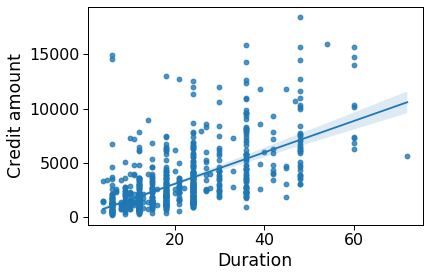

In [266]:
sns.regplot(x='Duration',y='Credit amount',data=df_raw3,fit_reg=True)

#### _With increase in credit amount , duration of loan is also increasing._

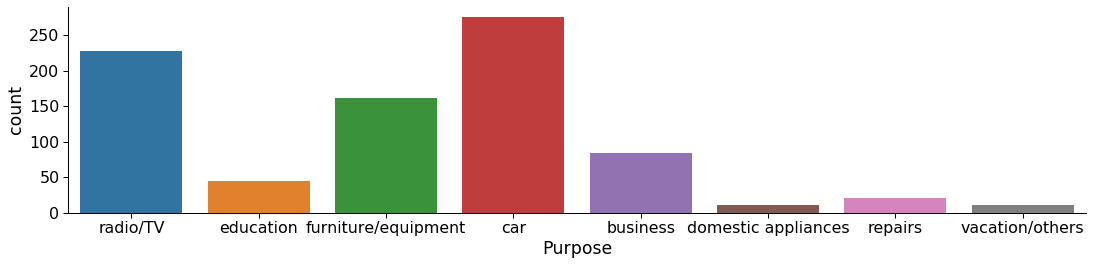

In [267]:
sns.catplot(x='Purpose',kind='count',data=df_raw3,height=4,aspect=3.8)

- Most people want loan for car or radio/TV
- Very few people want loan for domestic appliances and vacation.

Text(0.5, 1.0, 'Box plot of Purpose vs credit amount splitted on risk column')

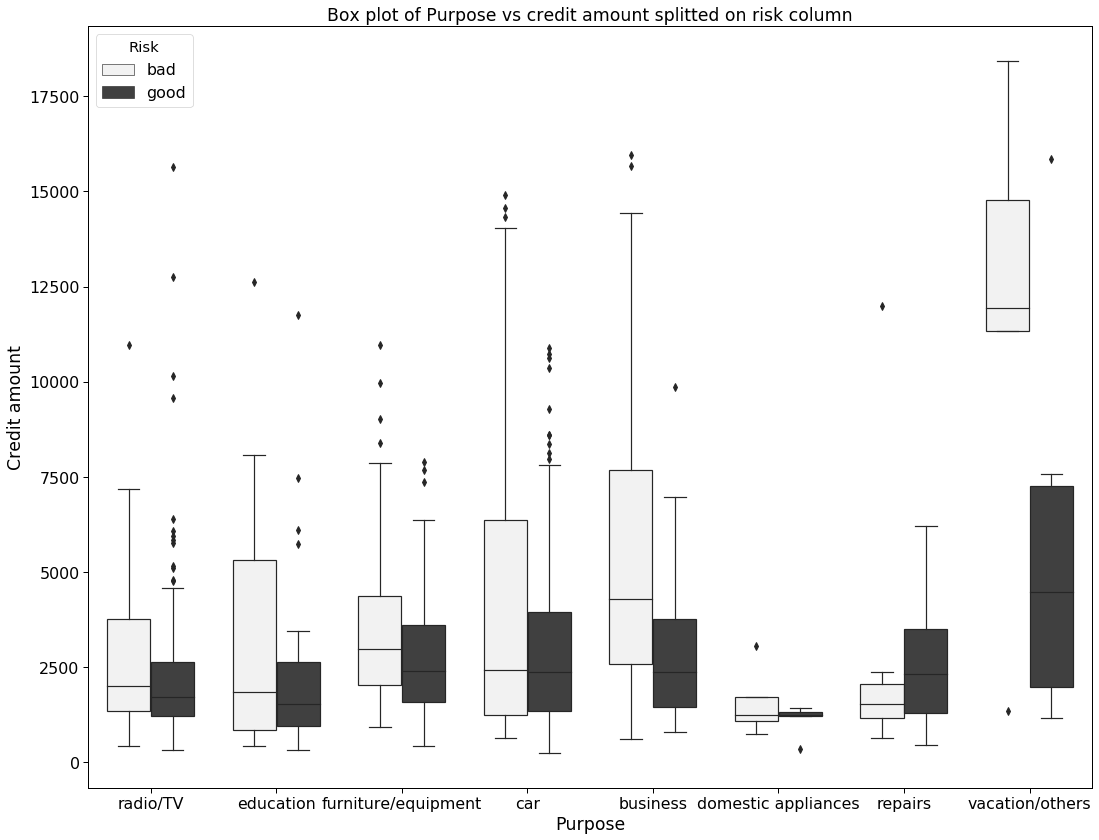

In [268]:
ax1=plt.subplots(figsize=(18,14))
ax1=sns.boxplot(x='Purpose',y='Credit amount',hue='Risk',data=df_raw3, color=".25",width=0.7)
ax1.set_title('Box plot of Purpose vs credit amount splitted on risk column')

### __Insights from above plot :__
- __outliers__ are still present and some need to be removed
- Median of credit amount is higher in case of bad risk in almost all purposes,Thus we can say that __with increase in credit amount the bad risk is more prominent__ .

#### We will be removing outliers using the very basic property of box plot 
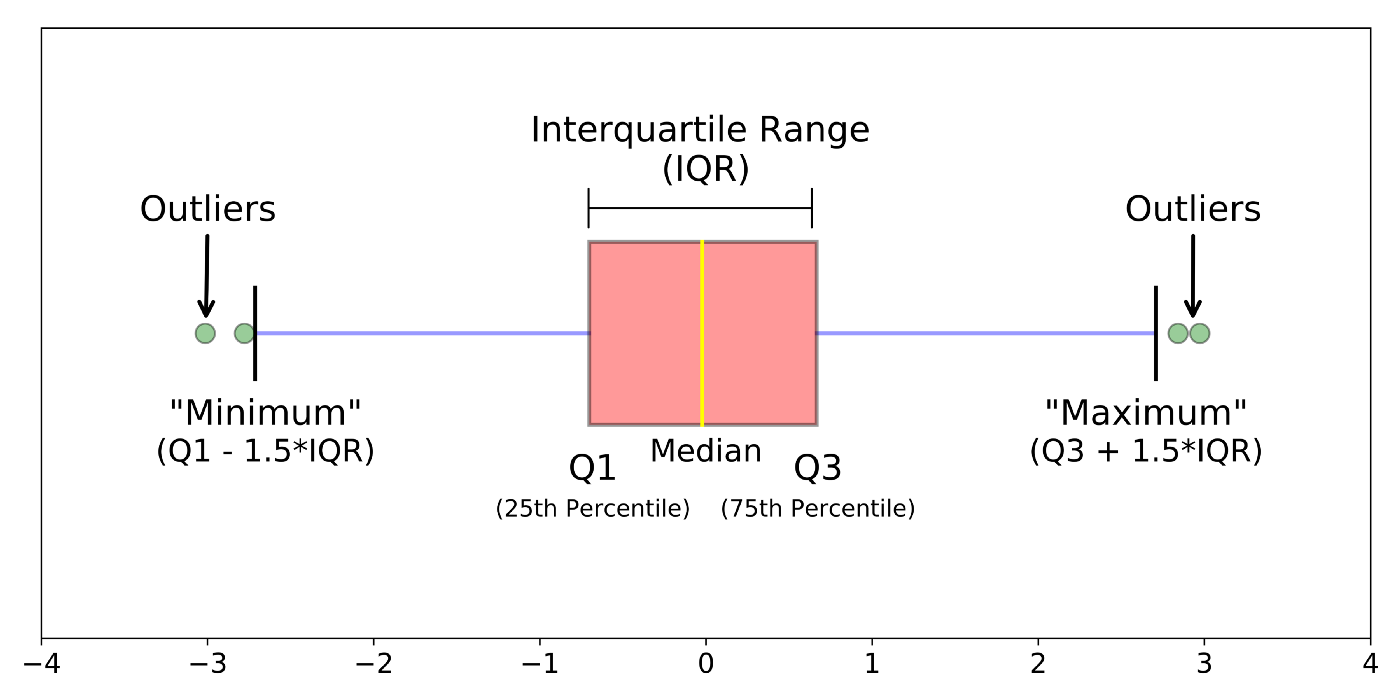

#### Removing datapoints which lie beyond  'MINIMUM' and 'MAXIMUM' of boxplot

In [269]:
#function to remove outliers based on credit amount with respect to every category in 'Purpose' column
def rem_outlier(df):
    q1=df['Credit amount'].quantile(0.25)
    q3=df['Credit amount'].quantile(0.75)
    iqr=q3-q1
    f1=(q1-1.5*iqr)
    f2=(q3+1.5*iqr)
    filter=(df['Credit amount'] >= f1) & (df['Credit amount'] <= f2)
    return df.loc[filter]

In [270]:
li=list(df_raw3.Purpose.unique())
li2=list(df_raw3.Risk.unique())
empdf=pd.DataFrame()
for j in li2:
    for i in li:
        dfapp1=rem_outlier(df_raw3[df_raw3['Purpose']==str(i)][df_raw3.Risk==str(j)])
        empdf=empdf.append(dfapp1)
empdf

C:\Users\Anshul\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Savings acc,Checking Acc,drop values
1,student,female,skilled,own,5951,48,radio/TV,bad,little,moderate,0
15,young adult,female,unskilled + resident,own,1282,24,radio/TV,bad,moderate,little,0
35,student,male,unskilled + resident,own,4746,45,radio/TV,bad,little,moderate,0
37,young adult,male,skilled,own,2100,18,radio/TV,bad,little,rich,0
56,mature adult,male,highly skilled,own,6468,12,radio/TV,bad,little,moderate,0
...,...,...,...,...,...,...,...,...,...,...,...
72,mature adult,male,highly skilled,free,1164,8,vacation/others,good,little,little,0
83,mature adult,female,unskilled + resident,own,1755,24,vacation/others,good,little,little,0
287,young adult,male,highly skilled,free,7582,48,vacation/others,good,moderate,moderate,0
442,student,male,skilled,own,2629,20,vacation/others,good,little,moderate,0


Text(0.5, 1.0, 'Box plot of Purpose vs credit amount splitted on risk column')

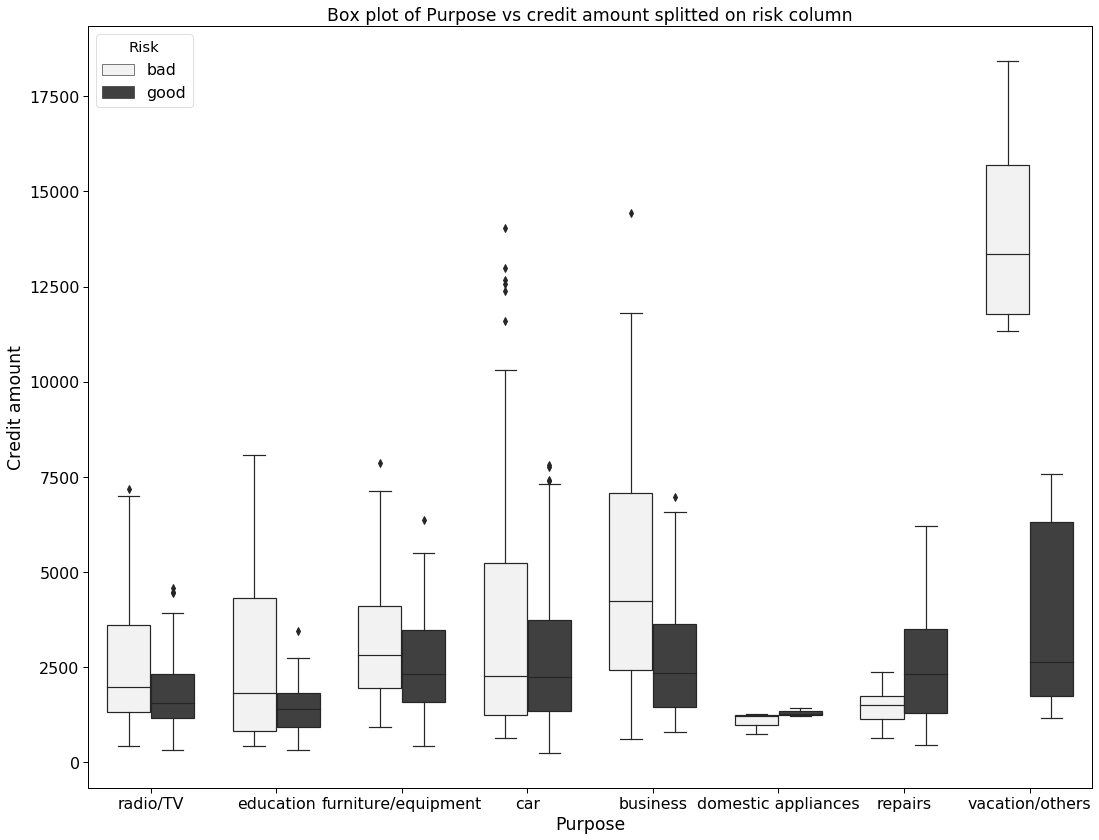

In [271]:
ax2=plt.subplots(figsize=(18,14))
ax2=sns.boxplot(x='Purpose',y='Credit amount',hue='Risk',data=empdf, color=".25",width=0.7)
ax2.set_title('Box plot of Purpose vs credit amount splitted on risk column')

__Number of outliers present has reduced dramatically__
- __The outliers removed are not just based on a single column__
- __Outliers which are based on 'Credit amount' column per every category in 'Purpose' column with respect to 'Good' or 'Bad' risk are removed.__

In [272]:
import plotly
print('done')

done


In [273]:
import plotly.express as px
fig=px.parallel_categories(empdf,
                          dimensions=['Job','Purpose','Risk'])
fig.update_layout(autosize=True, width=1000, height=800,font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"
    ))
fig.show()

In [317]:
fignew=px.parallel_categories(empdf,
                          dimensions=['Checking Acc','Purpose','Risk'])
fignew.update_layout(autosize=True, width=1000, height=800,font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    ))
fignew.show()

In [274]:
empdf.shape

(788, 11)

- Final Shape is 788 datapoints and total 11 columns (9 independent attributes and 1 target attribute) 
- 'drop values' column is to be ignored , will drop it soon

In [275]:
empdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 1 to 665
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            788 non-null    object
 1   Sex            788 non-null    object
 2   Job            788 non-null    object
 3   Housing        788 non-null    object
 4   Credit amount  788 non-null    int64 
 5   Duration       788 non-null    int64 
 6   Purpose        788 non-null    object
 7   Risk           788 non-null    object
 8   Savings acc    788 non-null    object
 9   Checking Acc   788 non-null    object
 10  drop values    788 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 93.9+ KB


In [276]:
empdf.nunique()

Age                4
Sex                2
Job                4
Housing            3
Credit amount    731
Duration          30
Purpose            8
Risk               2
Savings acc        4
Checking Acc       4
drop values        1
dtype: int64

In [277]:
empdf.tail(20)

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk,Savings acc,Checking Acc,drop values
207,student,male,skilled,own,1424,12,domestic appliances,good,little,moderate,0
350,student,female,skilled,rent,1236,9,domestic appliances,good,little,little,0
816,senior citizen,male,skilled,own,1338,6,domestic appliances,good,quite rich,quite rich,0
42,young adult,male,unskilled + resident,own,6204,18,repairs,good,little,moderate,0
156,mature adult,male,skilled,own,1288,9,repairs,good,moderate,little,0
225,student,male,skilled,own,2613,36,repairs,good,little,little,0
433,young adult,male,skilled,own,2058,24,repairs,good,little,little,0
436,student,male,unskilled + resident,rent,660,6,repairs,good,quite rich,quite rich,0
438,senior citizen,male,unskilled + non-resident,own,3394,42,repairs,good,little,little,0
520,young adult,male,skilled,free,5507,24,repairs,good,little,little,0


__Above is the provisionary dataframe ready to be modelled__

#### WE WILL TRY BUILDING 2 DIFFERENT TYPES OF MACHINE LEARNING MODELS NAMELY - 
- __RANDOM FOREST CLASSIFIER__
- __LOGISTIC REGRESSION CLASSIFIER__

- ## Model 1 - Random Forest classifier

In [278]:
X=empdf.drop(['Risk','drop values'],axis='columns')
X.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Savings acc,Checking Acc
1,student,female,skilled,own,5951,48,radio/TV,little,moderate
15,young adult,female,unskilled + resident,own,1282,24,radio/TV,moderate,little
35,student,male,unskilled + resident,own,4746,45,radio/TV,little,moderate
37,young adult,male,skilled,own,2100,18,radio/TV,little,rich
56,mature adult,male,highly skilled,own,6468,12,radio/TV,little,moderate


In [279]:
y=empdf.Risk
y.head()

1     bad
15    bad
35    bad
37    bad
56    bad
Name: Risk, dtype: object

In [280]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [281]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

### __Column transform :applies one-hot encoding on the categorical attributes and leaves the numerical attributes as they were and gives a dataframe upon which machine learning model can be made__

In [282]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ct=make_column_transformer((OneHotEncoder(),['Age','Sex','Job','Housing','Purpose','Savings acc','Checking Acc']),
                    remainder='passthrough')

In [283]:
xd=ct.fit_transform(X)

### __Creating a pipeline which first applies Column Transform on the dataframe and then applies machine learning algorithm on it__

In [284]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(ct,rfc)

In [285]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Age', 'Sex', 'Job',
                                                   'Housing', 'Purpose',
                                                   'Savings acc',
                                                   '

In [286]:
ypred=pipe.predict(X_test)

In [287]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred,normalize=True)

0.6751269035532995

#### _The accuracy is around 68 percent with 75 % as training data using Random Forest Classifier_

#### _Accuracy (in case of classification) only tells us the percentage of correctly classified outcomes and does not take into account the probabilities._

### Comparison with null accuracy

In [288]:
y_test.value_counts()

good    129
bad      68
Name: Risk, dtype: int64

Null accuracy = 129/(129+68) = 129/197 = 0.65 approx
- This indicates that dumb model which always predicts the most occuring result will be correct 65 % of times.
- since our accuracy(67 %) is not much higher than null accuracy(65 %) , there is surely some kind of error

In [289]:
print('true values',y_test.values[0:25])
print('pred values',ypred[0:25])

true values ['good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good'
 'good' 'good' 'good']
pred values ['good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good']


#### _One thing is quite clear from above values that accuracy of predicting 'good' risk is far greater than accuracy of predicting 'bad' risk_

Creating a confusion matrix to better understand the metric calculation 

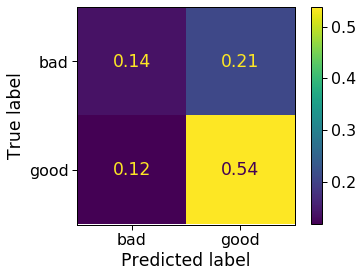

In [290]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe,X_test,y_test,normalize='all')

In [291]:
from sklearn.metrics import recall_score,precision_score
recall_score(y_test,ypred,average=None)

array([0.39705882, 0.82170543])

__Our model has recall of around 0.39,0.83 (bad, good) - in other words, it correctly identifies ~ 83 % of good risks and ~40% of bad risks__

In [292]:
precision_score(y_test,ypred,average=None)

array([0.54      , 0.72108844])

__Our model has precision of around 0.55,0.72 (bad, good) - in other words, when it predicts the risk is good , it is correct ~ 72 % of time and when it predicts the risk is bad, it is correct ~ 55 % of time__

### Both precision and recall of our model (random forest) are not satisfactory 

- ### Tuning hyperparameters of model

In [293]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "max_depth": [3,5, 7, 10,None],
    "n_estimators":[3,5,10,25,50,150],
    "max_features": [4,7,15,17,20]
}
clf = GridSearchCV(estimator=rfc, 
                    param_grid=param_grid,
                    cv=5)

clf.fit(xd,y)
print('parameters obtained using grid search:',clf.best_params_)

parameters obtained using grid search: {'max_depth': 10, 'max_features': 15, 'n_estimators': 150}


### We have got the best parameters for random forest classifier ,so now we'll be making another pipeline so as to compare metrics

In [294]:
rfc_tuned=RandomForestClassifier(n_estimators=50,max_features=10,max_depth=7)

In [295]:
# pipeline for model with parameters obtained using grid search
pipe_tuned=make_pipeline(ct,rfc_tuned)   
pipe_tuned.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Age', 'Sex', 'Job',
                                                   'Housing', 'Purpose',
                                                   'Savings acc',
                                                   '

In [296]:
ypred_tuned=pipe_tuned.predict(X_test)

In [297]:
print('accuracy score (grid search):',accuracy_score(y_test,ypred_tuned,normalize=True))

accuracy score (grid search): 0.6802030456852792


### _Accuracy increased from ~66 % to ~ 70 % by tuning the hyperparameters_

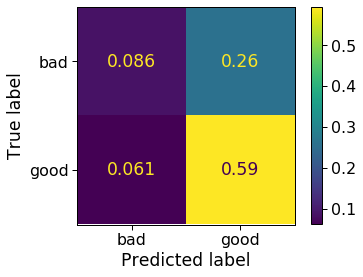

In [298]:
plot_confusion_matrix(pipe_tuned,X_test,y_test,normalize='all')

In [299]:
print('tuned recall score:',recall_score(y_test,ypred_tuned,average=None))
print('tuned precision score:',precision_score(y_test,ypred_tuned,average=None))

tuned recall score: [0.25       0.90697674]
tuned precision score: [0.5862069  0.69642857]


- ## Model 2 - Logistic Regression classifier

In [300]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [301]:
pipe2=make_pipeline(ct,lgr)

In [302]:
pipe2.fit(X_train,y_train)

C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Age', 'Sex', 'Job',
                                                   'Housing', 'Purpose',
                                                   'Savings acc',
                                                   '

In [303]:
ypred2=pipe2.predict(X_test)

In [304]:
accuracy_score(y_test,ypred2,normalize=True)

0.6852791878172588

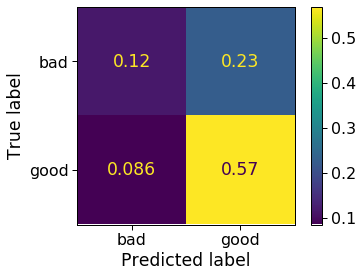

In [305]:
plot_confusion_matrix(pipe2,X_test,y_test,normalize='all')

In [306]:
recall_score(y_test,ypred2,average=None)

array([0.33823529, 0.86821705])

In [307]:
precision_score(y_test,ypred2,average=None)

array([0.575    , 0.7133758])

- ### Tuning hyperparameters of model 2

In [308]:
param_grid2={
    'C':np.logspace(-3,3,7),
    'penalty': ['l1','l2']
    
}
clf2 = GridSearchCV(estimator=lgr, 
                    param_grid=param_grid2,
                    cv=5)
clf2.fit(xd,y)
print('tuned hyperparameters for logistic reg classifier using grid search:',clf2.best_params_)

C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details:

C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Anshul\anaconda3\lib\site-pac

tuned hyperparameters for logistic reg classifier using grid search: {'C': 0.001, 'penalty': 'l2'}


C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Anshul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [309]:
lgr_tuned=LogisticRegression(penalty='l2',C=0.001) # l2 ridge, C - inverse of regularization(to prevent overfitting) strength ,strong here 

In [310]:
pipe_lgrt=make_pipeline(ct,lgr_tuned)

In [311]:
pipe_lgrt.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Age', 'Sex', 'Job',
                                                   'Housing', 'Purpose',
                                                   'Savings acc',
                                                   '

In [312]:
ypredlg_tuned=pipe_lgrt.predict(X_test)
accuracy_score(y_test,ypredlg_tuned,normalize=True)

0.7411167512690355

### _Increased accuracy of logistic regression classifier to ~74 %_

- ### _accuracy is increased because by changing the hyperparameter , we have used Ridge Regression (modified version of logistic regression)_ 
- ### _In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients._
- ### _This along with low value of C (inverse of strength of regularization) , overfitting is prevented here and thus accuracy is improved._

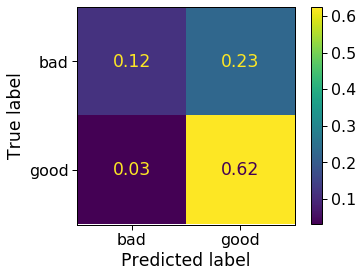

In [313]:
plot_confusion_matrix(pipe_lgrt,X_test,y_test,normalize='all')

In [314]:
recall_score(y_test,ypredlg_tuned,average=None)

array([0.33823529, 0.95348837])

In [315]:
precision_score(y_test,ypredlg_tuned,average=None)

array([0.79310345, 0.73214286])